In [23]:
from skimage.color import label2rgb
from scipy.ndimage import zoom
from skimage.transform import resize
import matplotlib.pyplot as plt
from os import getcwd

from tifffile import imread

import numpy as np


examples = ["Frame5_4.6x.tif", # lighter
            "Box13_P1_JK_4600x_0118.tif", # weird shape
            "Box13_P1_JK_4600x_0103.tif", 
            "Box13_P1_JK_4600x_0099.tif",
            "Box13_O2_JK_4600x_0004.tif", # darker
            ]

PREFIX = ""
MASK_SUFFIX = "_segmentation.tifnomalized.tif"

PRED_FOLDERS = ["masks", "preds/dv2_out", "preds/rf_out_no_crf"]

color_list = [[255, 255, 255], [44, 160, 44], [255, 127, 14], [31, 119, 180]]
COLORS = np.array(color_list) / 255.0

def remap_label_arr(arr: np.ndarray) -> np.ndarray:
    return (arr // np.unique(arr)[0]) - 1

print(getcwd())



/home/ronan/HR-Dv2/experiments/weakly_supervised


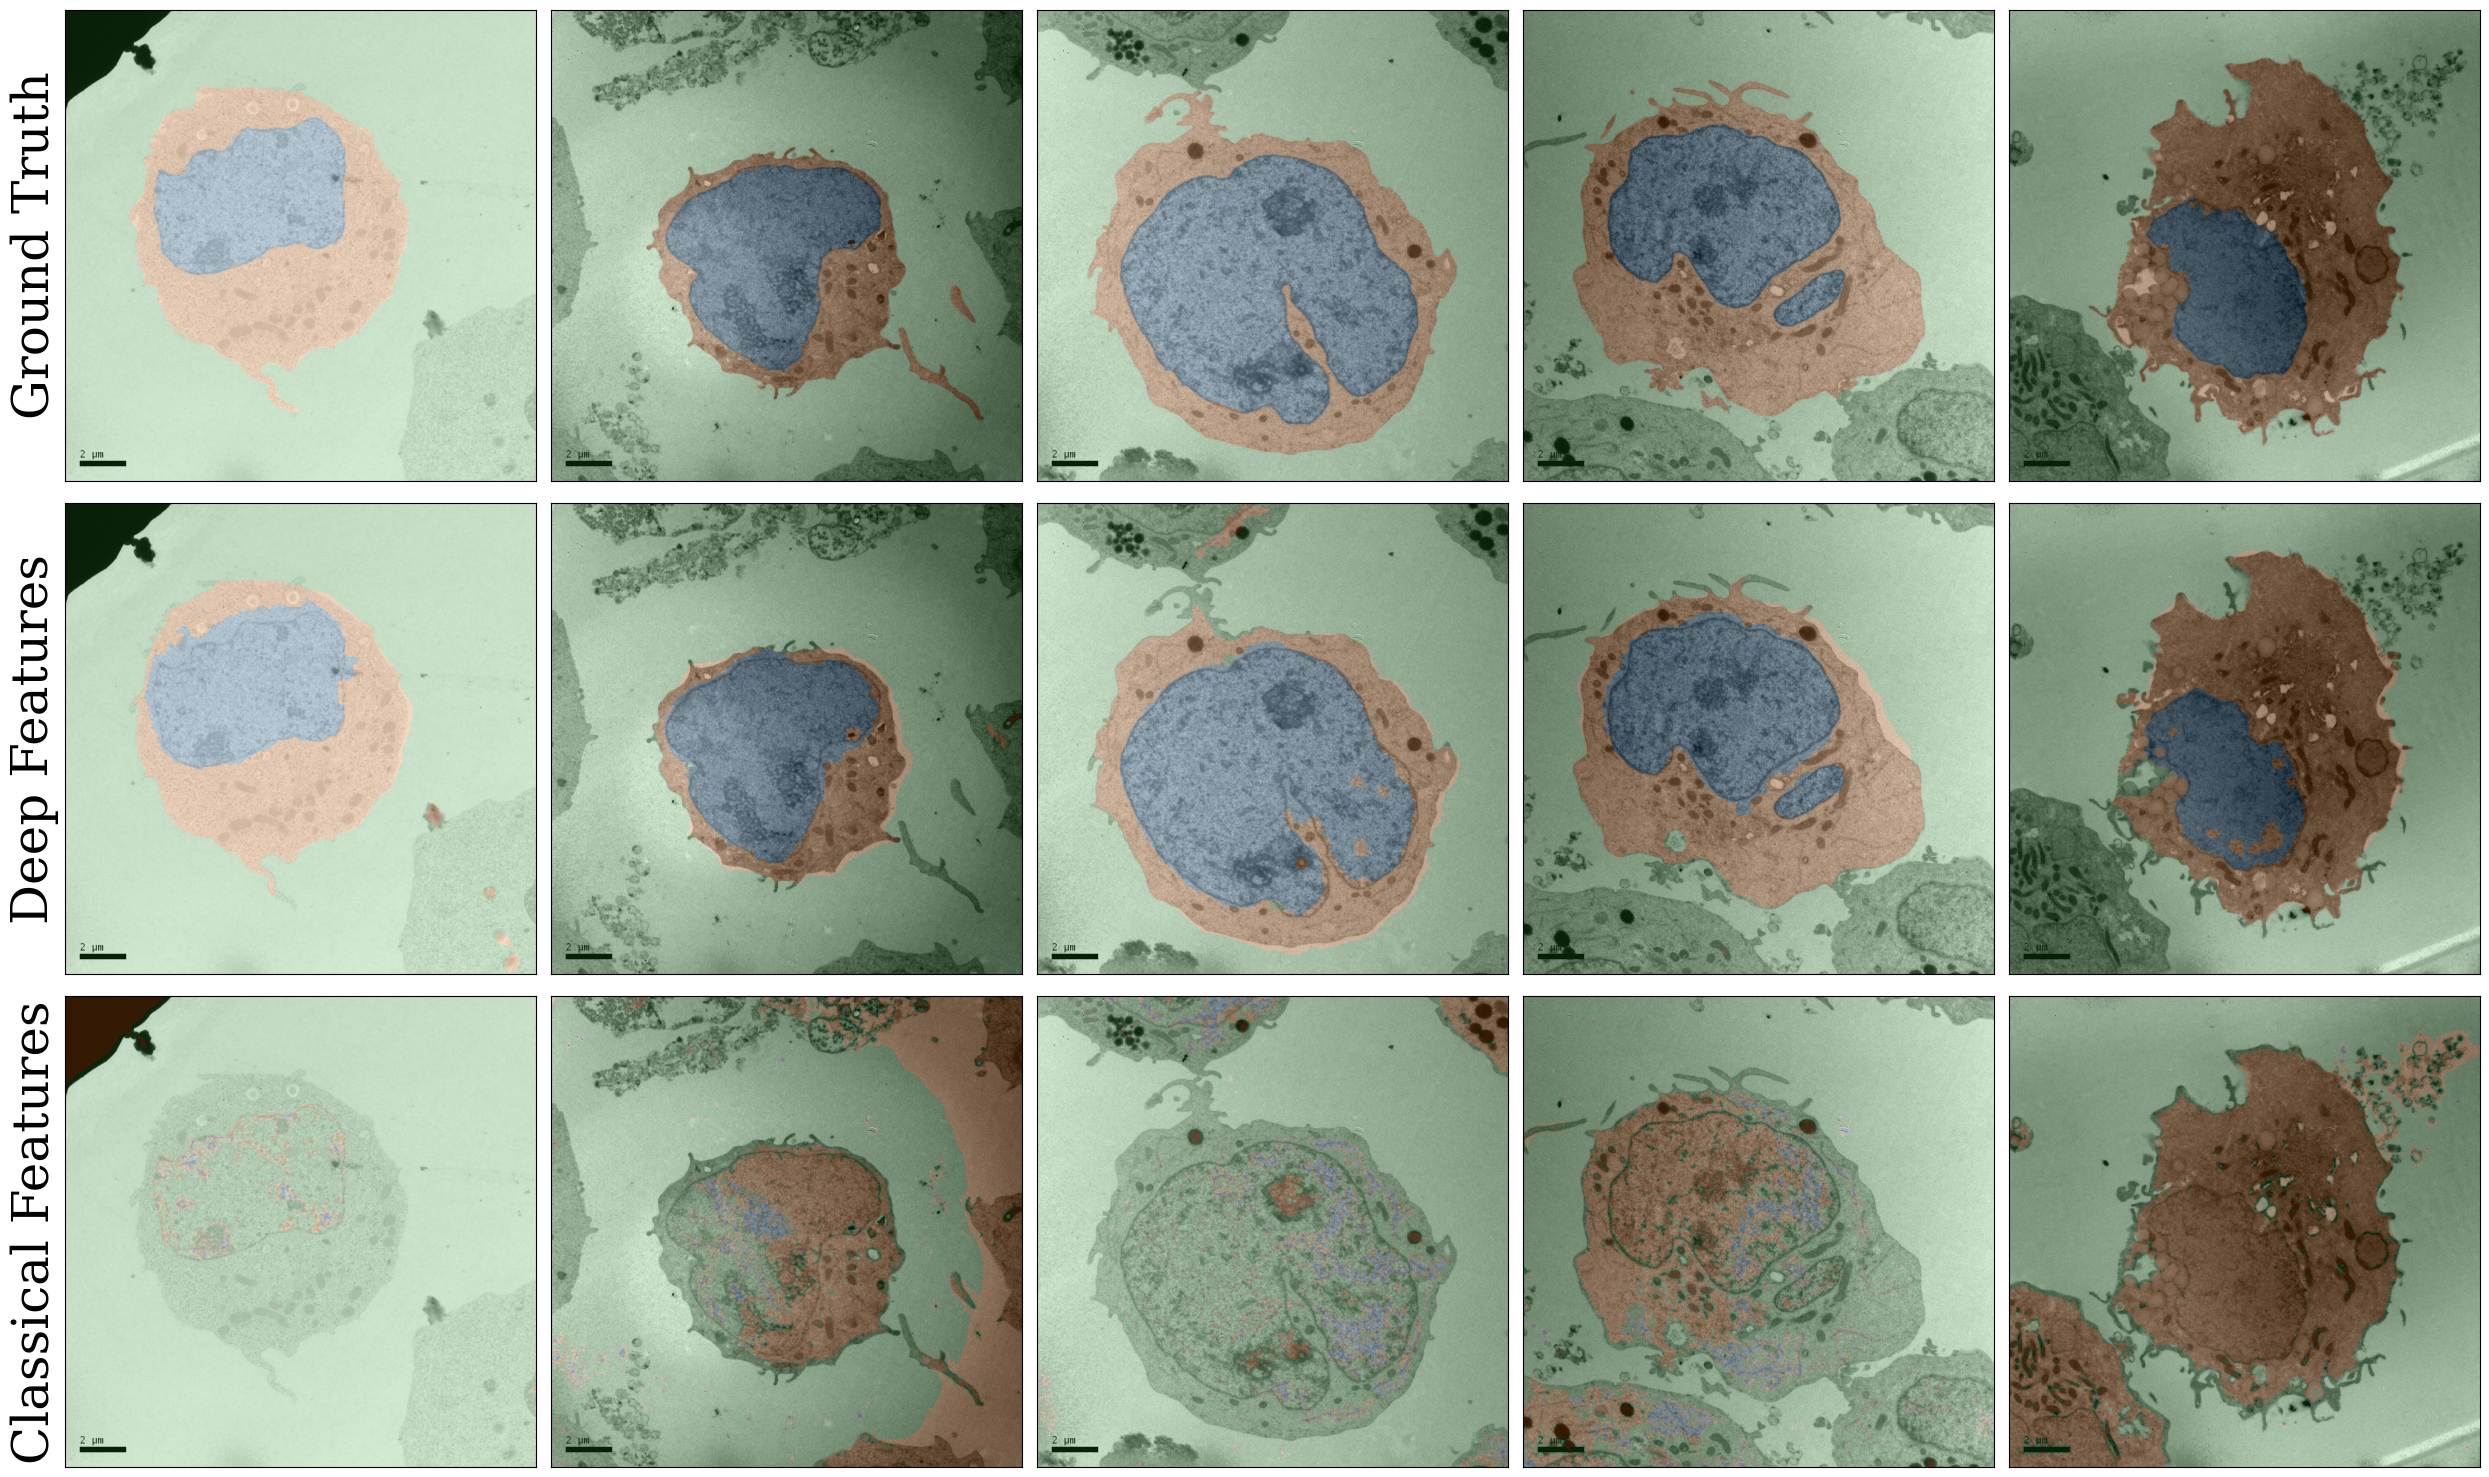

In [24]:
fig, axs = plt.subplots(nrows=3, ncols=len(examples))

fig.set_size_inches(25, 15)
plt.rcParams["font.family"] = "serif"
titles = ["Ground Truth", "Deep Features", "Classical Features"]

for col, fname in enumerate(examples):
    original = imread(f"data/{fname}")
    

    for row, pred_folder in enumerate(PRED_FOLDERS):
        ax = axs[row, col]

        if (col == 0):
            ax.set_ylabel(titles[row], fontsize=36)

        suffix = MASK_SUFFIX if row == 0 else ""
        
        low_res_data = imread(f"{pred_folder}/{fname}{suffix}")
        low_res_data = remap_label_arr(low_res_data)
        
        data = resize(low_res_data, (1024, 1024), preserve_range=True) if row > 0 else low_res_data
        data = data.astype(np.uint8)
        overlay = label2rgb(data, original, colors=COLORS[1:], alpha=0.2, bg_label=-1)
        
        ax.imshow(overlay)
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.set_axis_off()
plt.tight_layout()


In [25]:
data = np.genfromtxt("figures/scaling.csv", delimiter=",")[1:]
x = data[:, 0]
dv2_miou = data[:, 1]
dv2_std = data[:, 3]

rf_miou = data[:, 2]
rf_std = data[:, 4]
data

array([[ 1.   ,  0.799,  0.349,  0.136,  0.102],
       [ 2.   ,  0.778,  0.38 ,  0.158,  0.102],
       [ 4.   ,  0.799,  0.393,  0.141,  0.103],
       [ 8.   ,  0.827,  0.398,  0.126,  0.112],
       [16.   ,  0.858,  0.407,  0.115,  0.126]])

In [26]:
def format_plot(ax, title: str, xlabel: str, ylabel: str, title_fontsize: int, label_fontsize: int, tick_fontsize: int, legend_fontsize: int ) -> None:
    plt.rcParams["font.family"] = "serif"
    ax.set_xlabel(xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabel, fontsize=label_fontsize)
    ax.tick_params(axis='both', labelsize=tick_fontsize)
    ax.set_title(title, fontsize=title_fontsize)
    ax.legend(fontsize=legend_fontsize)

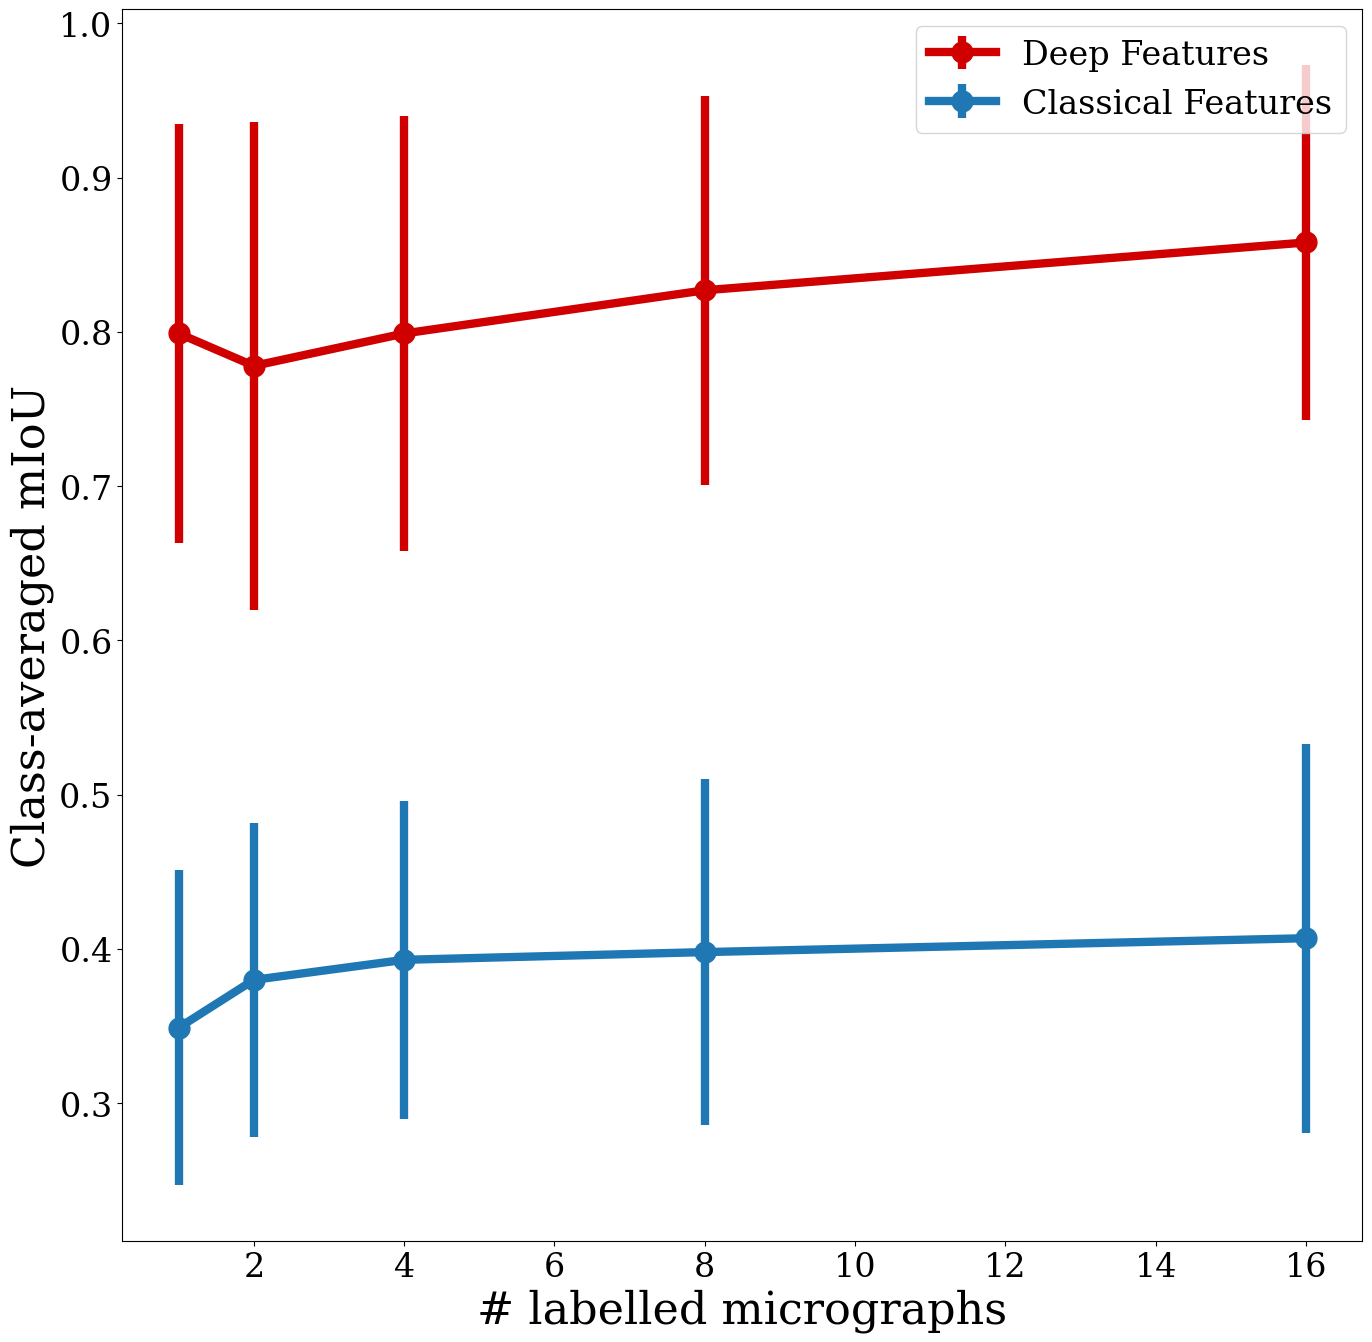

In [44]:
fig = plt.figure(2) #axs = plt.subplots(1, 2)
fig.set_size_inches(16, 16)

RED = '#d00000'
BLUE = '#1e74fd'
plt.errorbar(x, dv2_miou, dv2_std, label="Deep Features", marker='.', lw=6, ms=30, ecolor=RED, color=RED)
plt.errorbar(x, rf_miou, rf_std, label="Classical Features", marker='.', lw=6, ms=30)
format_plot(fig.gca(), "", "# labelled micrographs", "Class-averaged mIoU", 20, 32, 24, 24)